In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Clustering/Cust_Segmentation.csv")
df.head(10)

Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   
5            6   40    1              23      81      0.998       7.831   
6            7   38    2               4      56      0.442       0.454   
7            8   42    3               0      64      0.279       3.945   
8            9   26    1               5      18      0.575       2.215   
9           10   47    3              23     115      0.653       3.947   

   Defaulted Address  DebtIncomeRatio  
0        0.0  NBA001              6.3  
1        0.0  NBA021             12.8  
2        1.0  NBA013             20.9  
3        0.0  NBA009              6.3  
4        0.0  NBA008              7.2  
5        NaN  NBA016             10.9  
6        0.0  NBA013              1.6  
7        0.0  NBA009              6.6  
8        NaN  NBA006             15.5  
9        0.0  NBA011              4.0

In [4]:
df.tail()

Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
845          846   27    1               5      26      0.548       1.220   
846          847   28    2               7      34      0.359       2.021   
847          848   25    4               0      18      2.802       3.210   
848          849   32    1              12      28      0.116       0.696   
849          850   52    1              16      64      1.866       3.638   

     Defaulted Address  DebtIncomeRatio  
845        NaN  NBA007              6.8  
846        0.0  NBA002              7.0  
847        1.0  NBA001             33.4  
848        0.0  NBA012              2.9  
849        0.0  NBA025              8.6

In [5]:
import matplotlib.pyplot as plt

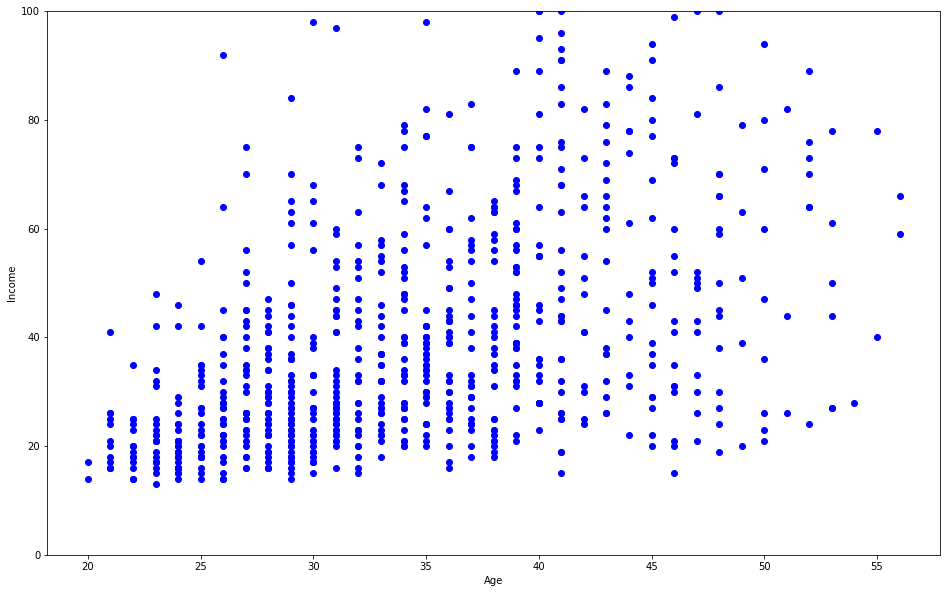

In [6]:
plt.figure(figsize=(16,10))
plt.plot(df.Age,df.Income,'bo')
plt.ylabel('Income')
plt.xlabel('Age')
plt.ylim(0,100)
plt.show()

In [7]:
import pandas_profiling as pp

In [8]:
pp.ProfileReport(df)

In [9]:
df = df.drop('Address',axis=1)
df.head()

Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted  DebtIncomeRatio  
0        0.0              6.3  
1        0.0             12.8  
2        1.0             20.9  
3        0.0              6.3  
4        0.0              7.2

In [10]:
X = df.values[:,1:]
X = np.nan_to_num(X)

In [11]:
from sklearn.preprocessing import StandardScaler
clus_dataset = StandardScaler().fit_transform(X)
clus_dataset

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [12]:
df.columns

Index(['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'Defaulted', 'DebtIncomeRatio'],
      dtype='object')

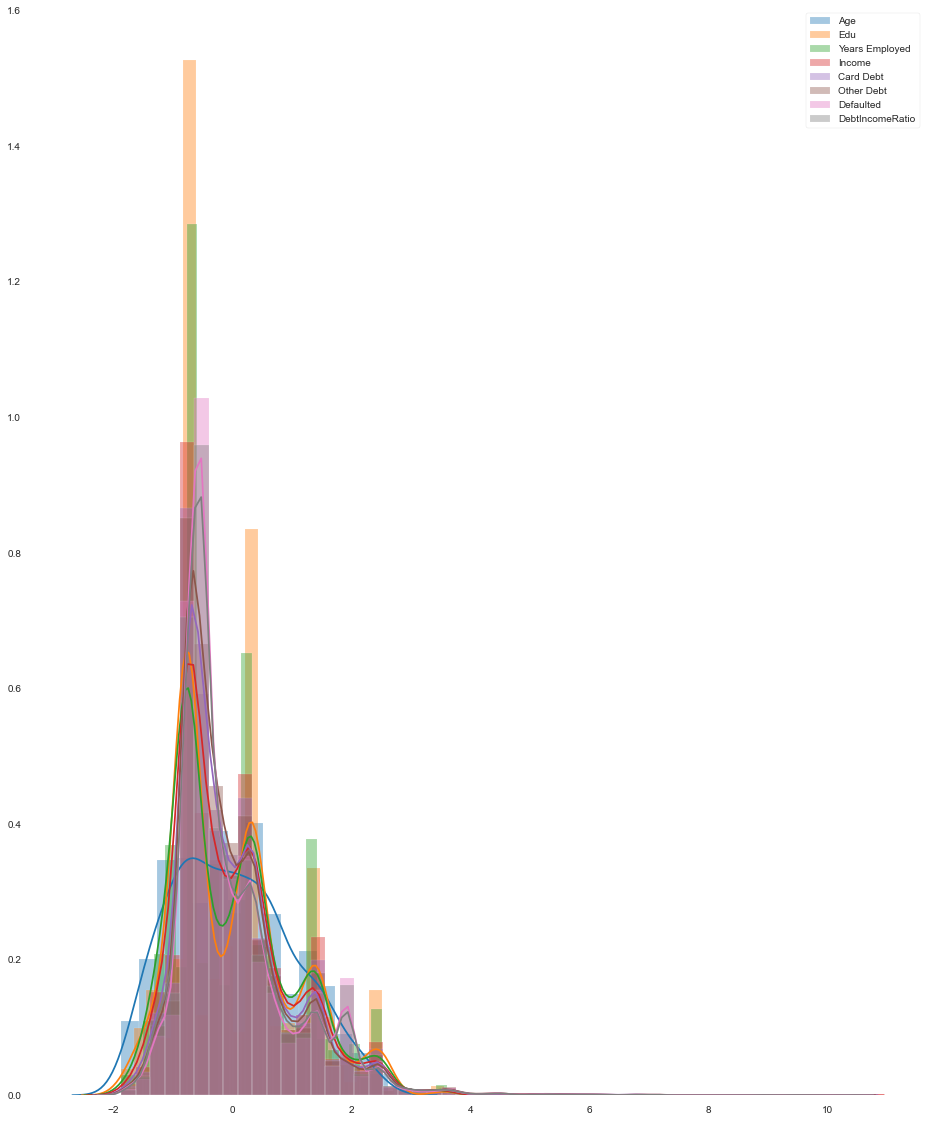

In [13]:
import seaborn as sns
col_1 = clus_dataset[:,:1]
col_2 = clus_dataset[:,:2]
col_3 = clus_dataset[:,:3]
col_4 = clus_dataset[:,:4]
col_5 = clus_dataset[:,:5]
col_6 = clus_dataset[:,:6]
col_7 = clus_dataset[:,:7]
col_8 = clus_dataset[:,:8]
plt.figure(figsize=(16,20))
sns.distplot(col_1,label='Age')
sns.distplot(col_2,label='Edu')
sns.distplot(col_3,label='Years Employed')
sns.distplot(col_4,label='Income')
sns.distplot(col_5,label='Card Debt')
sns.distplot(col_6,label='Other Debt')
sns.distplot(col_7,label='Defaulted')
sns.distplot(col_8,label='DebtIncomeRatio')

plt.legend()

### Modeling

In [14]:
X.shape

(850, 8)

n_cluster : The number of clusters to form as well as the number of centroids to operate\
init : {'k-means++','random','ndarray','callable'},default='k-means++'
        Method for initialization 
        k-means++: selects initial cluster for k mean clustering in a smart way to speed up convergence se es ection notes in k_init for more details
        random: choose 
        if ndarray is passed it should be of shape

In [15]:
from sklearn.cluster import KMeans

In [16]:
no_of_clusters = 3

kmeans = KMeans(init='k-means++',n_clusters = no_of_clusters,n_init=12)
kmeans.fit(X) # only features

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
labels = kmeans.labels_

In [18]:
df['Target']= labels
df.head()

Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted  DebtIncomeRatio  Target  
0        0.0              6.3       0  
1        0.0             12.8       2  
2        1.0             20.9       0  
3        0.0              6.3       0  
4        0.0              7.2       1

In [19]:
df.groupby('Target').mean()

Customer Id        Age       Edu  Years Employed      Income  \
Target                                                                 
0        432.006154  32.967692  1.613846        6.389231   31.204615   
1        410.166667  45.388889  2.666667       19.555556  227.166667   
2        403.780220  41.368132  1.961538       15.252747   84.076923   

        Card Debt  Other Debt  Defaulted  DebtIncomeRatio  
Target                                                     
0        1.032711    2.108345   0.284658        10.095385  
1        5.678444   10.907167   0.285714         7.322222  
2        3.114412    5.770352   0.172414        10.725824

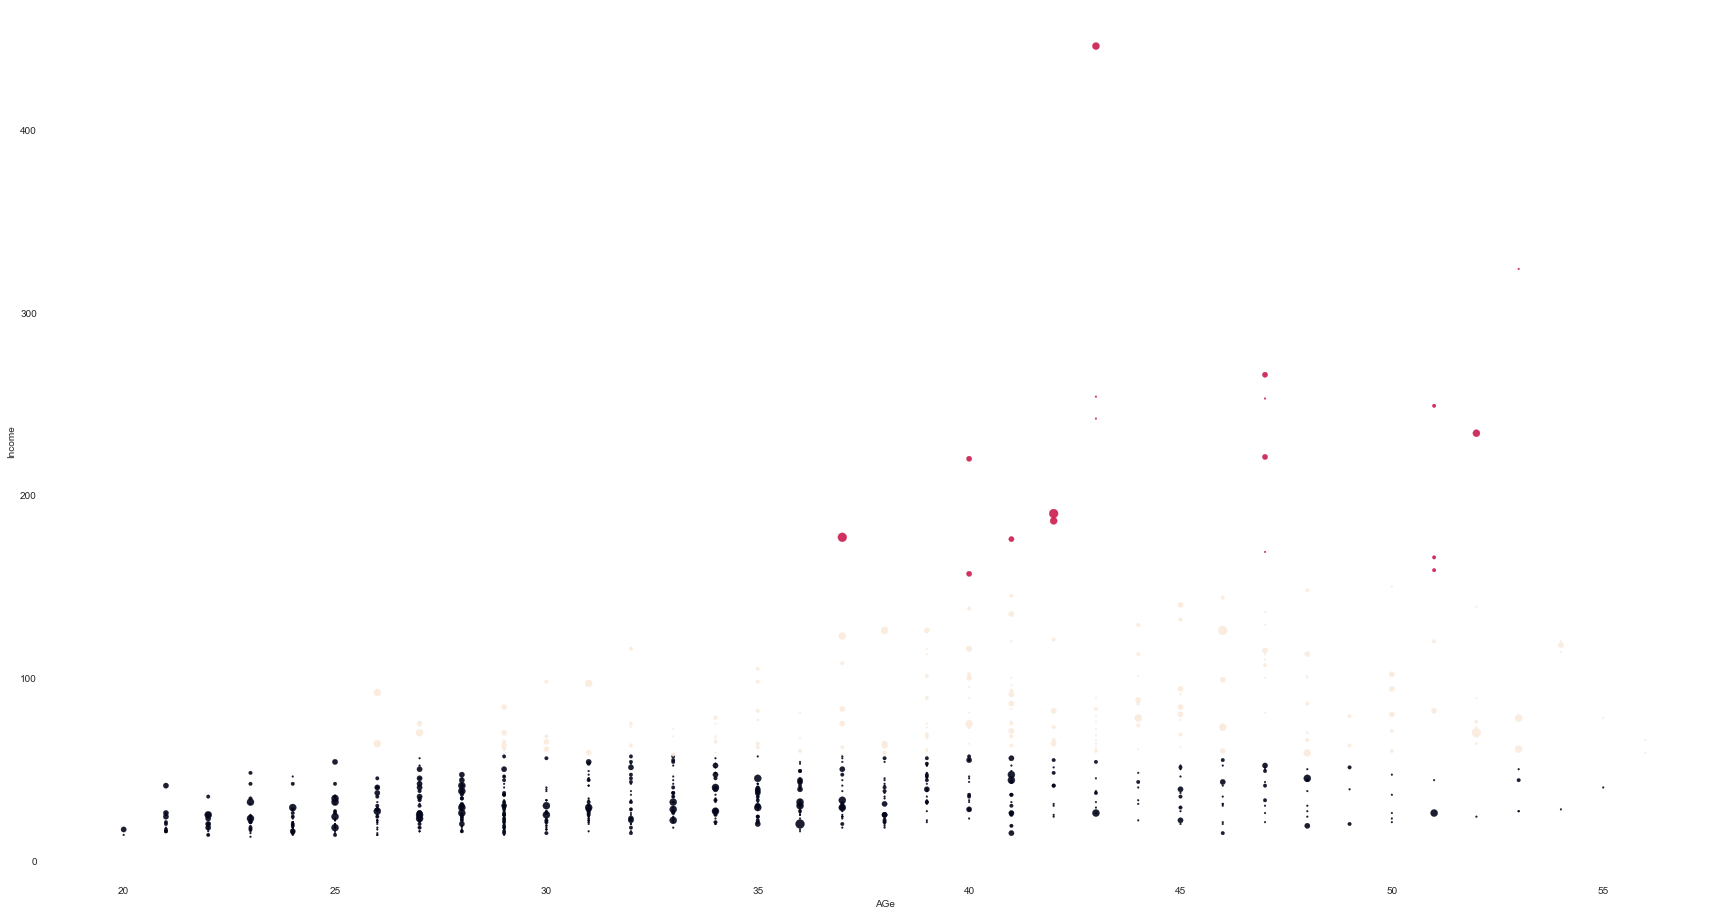

In [21]:
area = np.pi*(X[:,1])**2
plt.figure(figsize=(30,16))
plt.scatter(X[:,0],X[:,3],s=area,c=labels.astype(np.float),alpha=0.9)
plt.xlabel("AGe",fontsize=10)
plt.ylabel("Income",fontsize=10)
plt.show()

In [ ]:
! pip